In [15]:
import pandas as pd

**Dataset Overview**

- The dataset below represent how many sales (in millions) we can get based on the different promotional/advertisement means
- For example, if we spend some money (in millions) for advertisement on TV, some money on social media, some money on radio and hire a influencer as our brand embassoder, how much sales our product can get
- We'll estimate sales based on different amount of money and different types of influencers

In [16]:
df = pd.read_csv("advertised_sales_estimates.csv")
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


**Getting Valuable Insights**

- Below we can use different methods to get valueable insights about our dataset

In [17]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [18]:
df.Influencer.unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,4562.0,54.066857,26.125054,10.000000,32.000000,53.000000,77.000000,100.000000
Radio,4568.0,18.160356,9.676958,0.000684,10.525957,17.859513,25.649730,48.871161
Social Media,4566.0,3.323956,2.212670,0.000031,1.527849,3.055565,4.807558,13.981662
Sales,4566.0,192.466602,93.133092,31.199409,112.322882,189.231172,272.507922,364.079751


**Checking of Null Values**

- If we look up in the description of this dataframe we can see that data count for each column is different
- That means some of the values in the columns are missing
- We can check for those values and get count how much values in column are null

In [21]:
df.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

**Getting All the Records with Null Values**

- We'll get an array of True or False values, True value if the record has a null value in its attribute
- With this array of True and False values we can get another dataframe of where atleast one of the attributes values are null
- Giving the array of True and False values to dataframe only those records where value is True (or null) will be returned

In [27]:
null_records = df.isnull().any(axis=1)
null_df = df[null_records]
null_df

,TV,Radio,Social Media,Influencer,Sales
13,NaN,22.351667,3.031815,Mega,276.165351
26,NaN,34.111674,4.624148,Nano,342.913372
46,NaN,34.859637,7.781417,Mega,318.969784
75,NaN,6.482293,0.866845,Macro,91.177216
99,NaN,7.635819,1.554146,Macro,56.186730
119,NaN,30.470485,6.806919,Micro,336.818690
141,NaN,9.164464,1.096681,Macro,65.259189
163,NaN,38.118424,6.676611,Micro,328.555184
182,81.0,26.425422,NaN,Macro,288.649441
183,NaN,1.287060,0.396179,Macro,56.545293


In [28]:
null_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 13 to 236
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            16 non-null     float64
 1   Radio         22 non-null     float64
 2   Social Media  20 non-null     float64
 3   Influencer    26 non-null     object 
 4   Sales         20 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


**Handling Null Values**

- Only 26 records in 4572 are null, that's 0.5% of the original data, so we can drop them

In [29]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 213.1+ KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,4546.0,54.062912,26.104942,10.000000,32.000000,53.000000,77.000000,100.000000
Radio,4546.0,18.157533,9.663260,0.000684,10.555355,17.859513,25.640603,48.871161
Social Media,4546.0,3.323473,2.211254,0.000031,1.530822,3.055565,4.804919,13.981662
Sales,4546.0,192.413332,93.019873,31.199409,112.434612,188.963678,272.324236,364.079751


In [41]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(df[["Influencer"]])
encoder.categories_

[array(['Macro', 'Mega', 'Micro', 'Nano'], dtype=object)]

In [43]:
encoded = encoder.transform(df[["Influencer"]]).toarray()
encoded

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [46]:
df[["Influencer_Macro", "Influencer_Mega", "Influencer_Micro", "Influencer_Nano"]] = encoded
df.head()

/var/folders/s4/6xfvsnk120q0qz068w2vlqzm0000gq/T/ipykernel_36036/1772669211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Influencer_Macro", "Influencer_Mega", "Influencer_Micro", "Influencer_Nano"]] = encoded


,TV,Radio,Social Media,Influencer,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,Mega,54.732757,0.0,1.0,0.0,0.0
1,13.0,9.237765,2.409567,Mega,46.677897,0.0,1.0,0.0,0.0
2,41.0,15.886446,2.913410,Mega,150.177829,0.0,1.0,0.0,0.0
3,83.0,30.020028,6.922304,Mega,298.246340,0.0,1.0,0.0,0.0
4,15.0,8.437408,1.405998,Micro,56.594181,0.0,0.0,1.0,0.0


In [61]:
inputs = df.drop("Influencer", axis=1)
inputs.corr().T

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
TV,1.000000,0.869158,0.527687,0.999497,0.022174,-0.012797,-0.005048,-0.004097
Radio,0.869158,1.000000,0.606338,0.868638,0.012859,-0.006580,0.002400,-0.008570
Social Media,0.527687,0.606338,1.000000,0.527446,0.014152,0.012437,-0.013923,-0.012582
Sales,0.999497,0.868638,0.527446,1.000000,0.022349,-0.012530,-0.005218,-0.004367
Influencer_Macro,0.022174,0.012859,0.014152,0.022349,1.000000,-0.331530,-0.330759,-0.328061
Influencer_Mega,-0.012797,-0.006580,0.012437,-0.012530,-0.331530,1.000000,-0.338633,-0.335871
Influencer_Micro,-0.005048,0.002400,-0.013923,-0.005218,-0.330759,-0.338633,1.000000,-0.335090
Influencer_Nano,-0.004097,-0.008570,-0.012582,-0.004367,-0.328061,-0.335871,-0.335090,1.000000


<Axes: xlabel='Influencer', ylabel='Sales'>

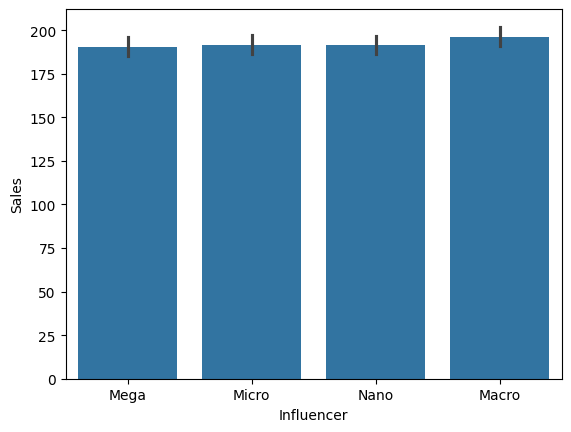

In [64]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.barplot(x=df['Influencer'], y=df['Sales'])

Text(0, 0.5, 'Sales')

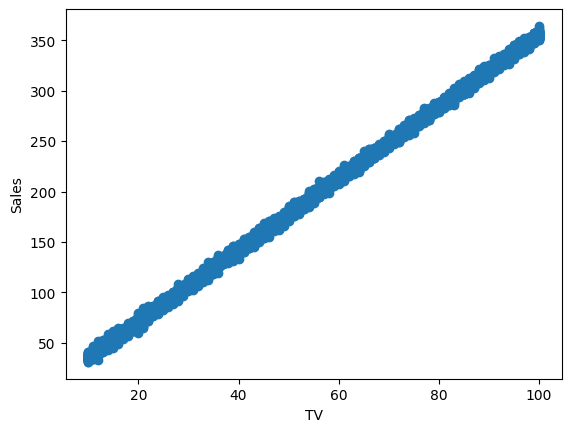

In [66]:
plt.scatter(df['TV'], df['Sales'] )
plt.xlabel('TV')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

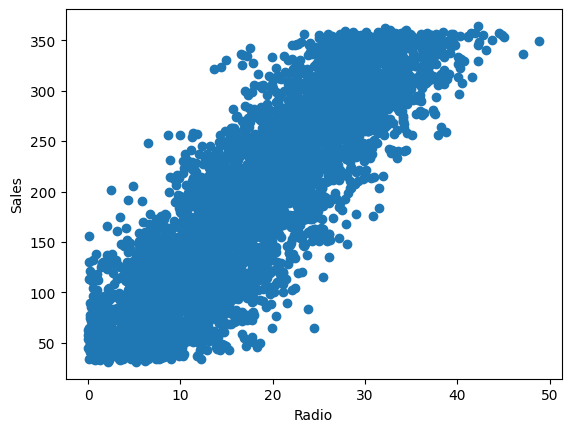

In [68]:
plt.scatter(df['Radio'], df['Sales'] )
plt.xlabel('Radio')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

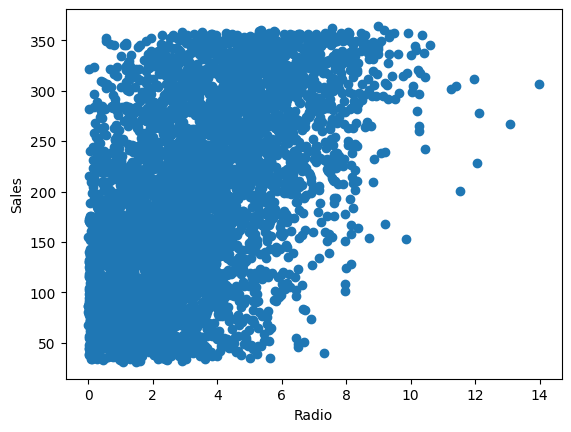

In [69]:
plt.scatter(df['Social Media'], df['Sales'] )
plt.xlabel('Radio')
plt.ylabel('Sales')

In [62]:
inputs = inputs.drop("Sales", axis=1)
target = df["Sales"]
inputs.head()

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,0.0,1.0,0.0,0.0
1,13.0,9.237765,2.409567,0.0,1.0,0.0,0.0
2,41.0,15.886446,2.913410,0.0,1.0,0.0,0.0
3,83.0,30.020028,6.922304,0.0,1.0,0.0,0.0
4,15.0,8.437408,1.405998,0.0,0.0,1.0,0.0


In [50]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
numeric_inputs = inputs[['TV', 'Radio', 'Social Media']]
scaler.fit(numeric_inputs)
print(scaler.mean_)
print(np.sqrt(scaler.var_))

[54.06291245 18.1575331   3.32347286]
[26.10207048  9.66219671  2.21101071]
